In [2]:
import pandas as pd
import numpy as np
com_sales = pd.read_csv('datasets/Company Sales.csv')
com_sales.describe()

,Sales
count,77.000000
mean,298.402597
std,198.430570
min,36.000000
25%,148.000000
50%,257.000000
75%,392.000000
max,895.000000


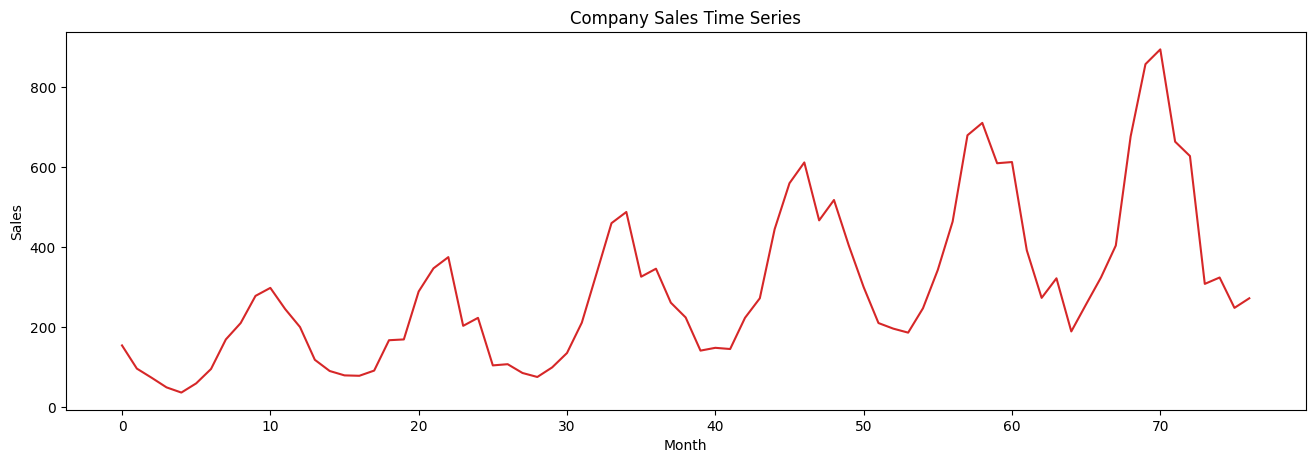

In [3]:
from matplotlib import pyplot as plt

def plot_df(com_sales, x, y, title="", xlabel='Month', ylabel='Sales', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(com_sales['Sales'], x=com_sales.index, y=com_sales['Sales'], title='Company Sales Time Series')

In [4]:
com_sales['log_sales'] = np.log(com_sales['Sales'])
com_sales['log_sales']

0     5.036953
1     4.564348
2     4.290459
3     3.891820
4     3.583519
        ...   
72    6.442540
73    5.730100
74    5.780744
75    5.513429
76    5.605802
Name: log_sales, Length: 77, dtype: float64

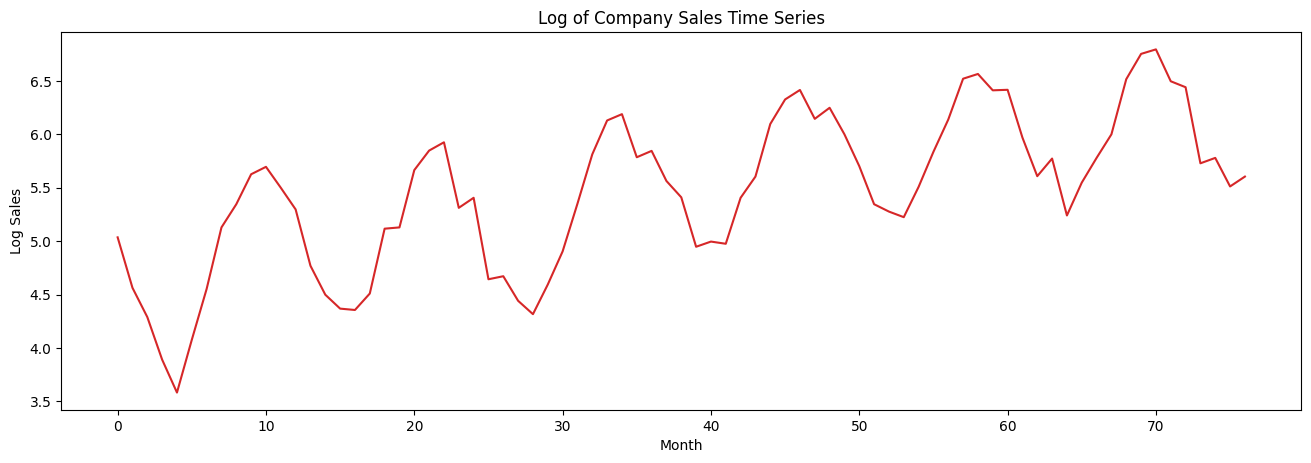

In [5]:
# Plot these - see what stabilizes variance best
#1. log(y)
#2. y^0.25
#3. y^0.5

# take log of series to make the variance stationary. this is requirement for ARIMA

from matplotlib import pyplot as plt

def plot_df(df, x, y, title="", xlabel='Month', ylabel='Log Sales', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(com_sales['log_sales'], x=com_sales.index, y=com_sales['log_sales'], title='Log of Company Sales Time Series')

In [6]:
com_sales['root_four_sales'] = np.power(com_sales['Sales'],0.25)
com_sales['root_four_sales']

0     3.522737
1     3.130169
2     2.923013
3     2.645751
4     2.449490
        ...   
72    5.005989
73    4.189264
74    4.242641
75    3.968377
76    4.061086
Name: root_four_sales, Length: 77, dtype: float64

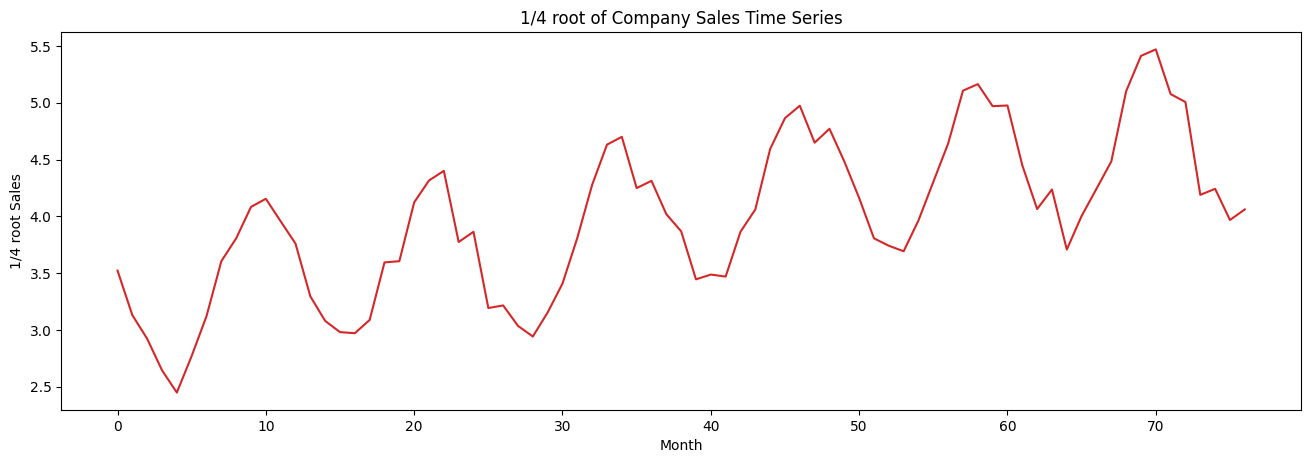

In [7]:
from matplotlib import pyplot as plt

def plot_df(df, x, y, title="", xlabel='Month', ylabel='1/4 root Sales', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(com_sales['root_four_sales'], x=com_sales.index, y=com_sales['root_four_sales'], title='1/4 root of Company Sales Time Series')

In [8]:
com_sales['root_two_sales'] = np.power(com_sales['Sales'],0.5)
com_sales['root_two_sales']

0     12.409674
1      9.797959
2      8.544004
3      7.000000
4      6.000000
        ...    
72    25.059928
73    17.549929
74    18.000000
75    15.748016
76    16.492423
Name: root_two_sales, Length: 77, dtype: float64

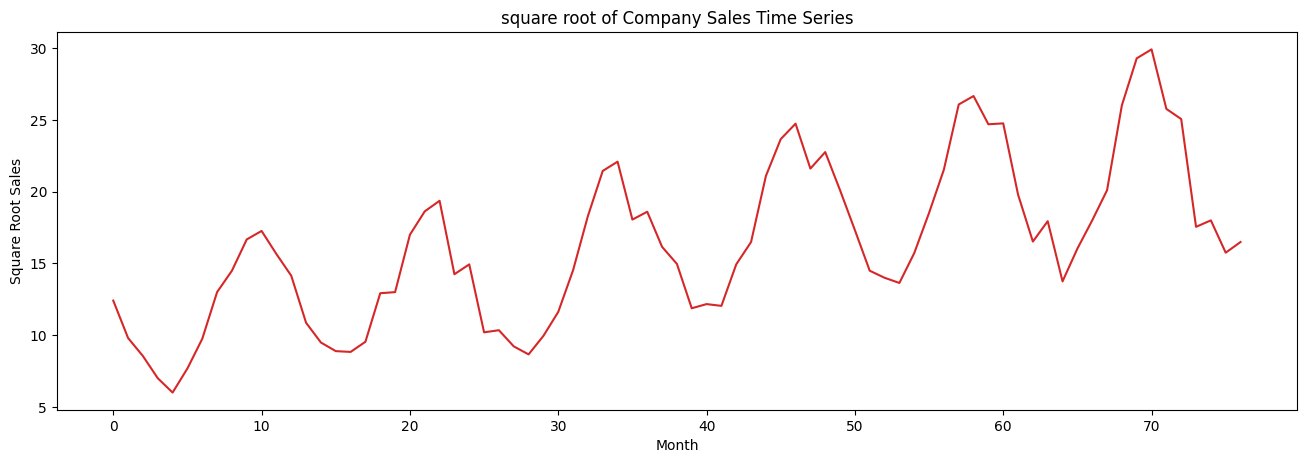

In [9]:
from matplotlib import pyplot as plt

def plot_df(df, x, y, title="", xlabel='Month', ylabel='Square Root Sales', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(com_sales['root_two_sales'], x=com_sales.index, y=com_sales['root_two_sales'], title='square root of Company Sales Time Series')

c:\users\justin scott\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


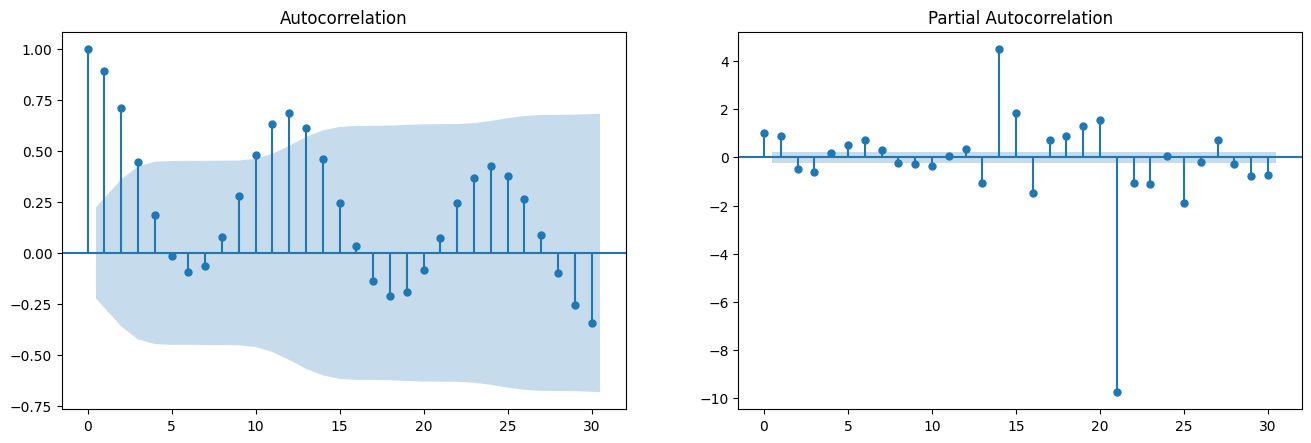

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=100)
plot_acf(com_sales['root_four_sales'].tolist(), lags=30, ax=axes[0])
plot_pacf(com_sales['root_four_sales'].tolist(), lags=30, ax=axes[1])
plt.show()

In [11]:
root_four_sales_trend = []
for i in range(len(com_sales['root_four_sales']) - 1):
    root_four_sales_trend.append(com_sales['root_four_sales'][i+1] - com_sales['root_four_sales'][i])

c:\users\justin scott\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


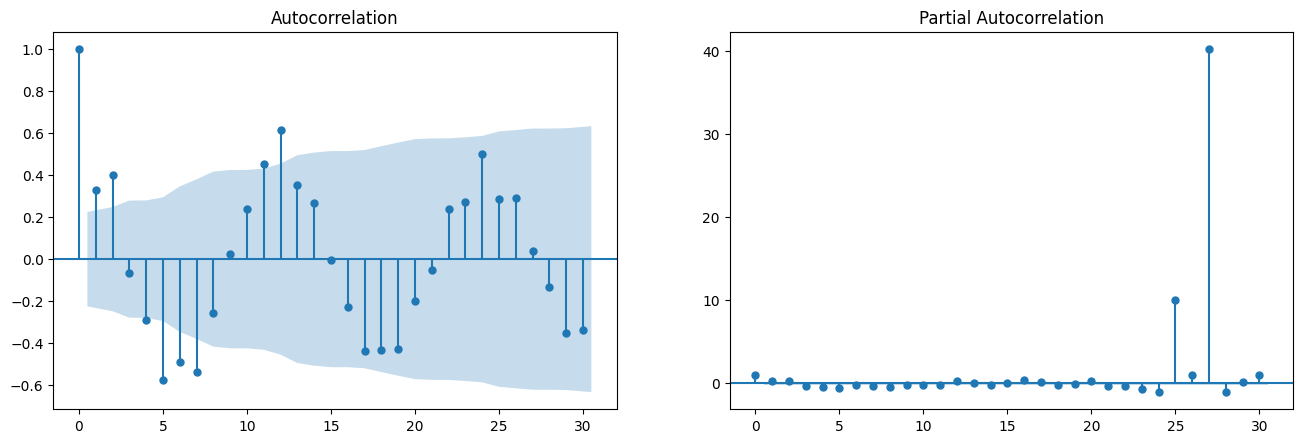

In [12]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=100)
plot_acf(root_four_sales_trend, lags=30, ax=axes[0])
plot_pacf(root_four_sales_trend, lags=30, ax=axes[1])
plt.show()

In [13]:
root_four_sales_seas_trend = []
for i in range(1, len(root_four_sales_trend) - 12):
    root_four_sales_seas_trend.append(root_four_sales_trend[i+12] - root_four_sales_trend[i])

c:\users\justin scott\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


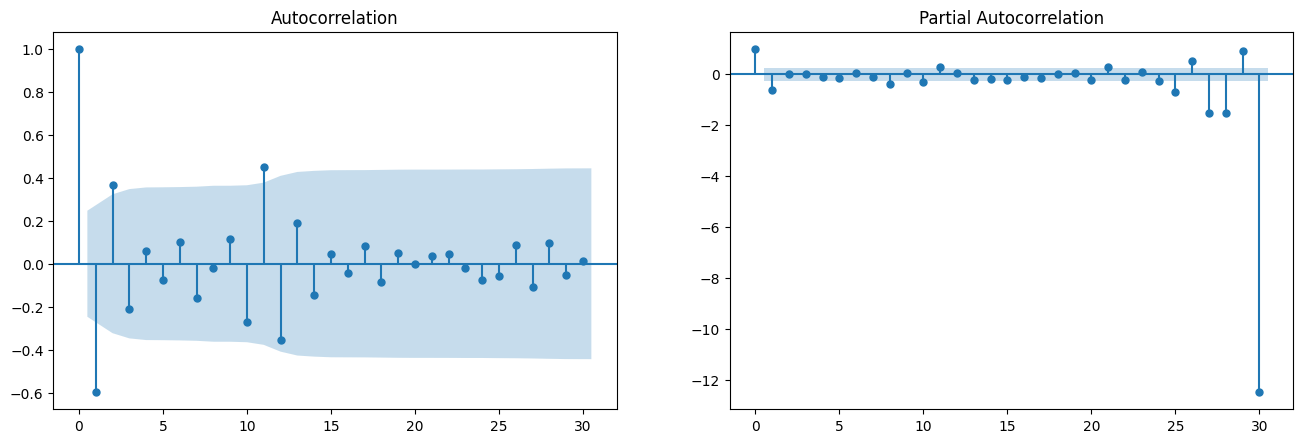

In [14]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=100)
plot_acf(root_four_sales_seas_trend, lags=30, ax=axes[0])
plot_pacf(root_four_sales_seas_trend, lags=30, ax=axes[1])
plt.show()

In [15]:
# 0,1,0 0,1,0
# PMD Arima - p/q P/Q
# Forecast

import pmdarima as pm
model = pm.auto_arima(com_sales['root_four_sales'], start_p=0, d=1, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=2, max_q=2,
                      max_d=1, 
# maximum p and q
                      m=12,              # frequency of series
                      seasonal=True,    # Seasonality
#                      max_D=2, 
                      max_P=1, max_Q=1,
                      start_P=0, D=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-4.056, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-34.582, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-34.406, Time=0.05 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-15.824, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-32.665, Time=0.16 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-32.693, Time=0.17 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-30.394, Time=0.22 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=-32.588, Time=0.20 sec

Best model:  ARIMA(1,1,0)(1,1,0)[12]          
Total fit time: 3.641 seconds


c:\users\justin scott\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\justin scott\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


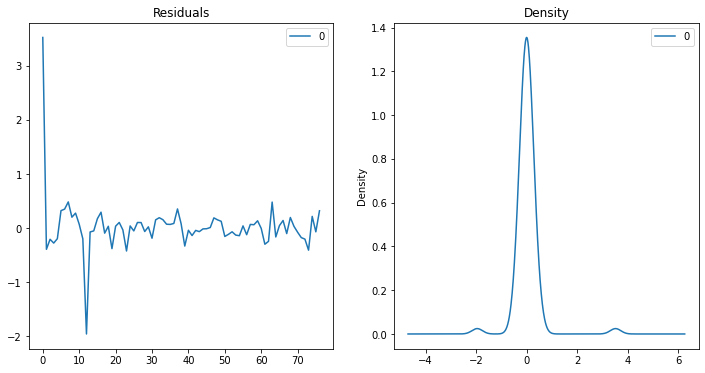

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_fit = SARIMAX(com_sales['root_four_sales'], trend='n', order=(1, 1, 0), seasonal_order=(1, 1, 0, 12)).fit(disp=0, maxiter=1000)

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(12,6))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

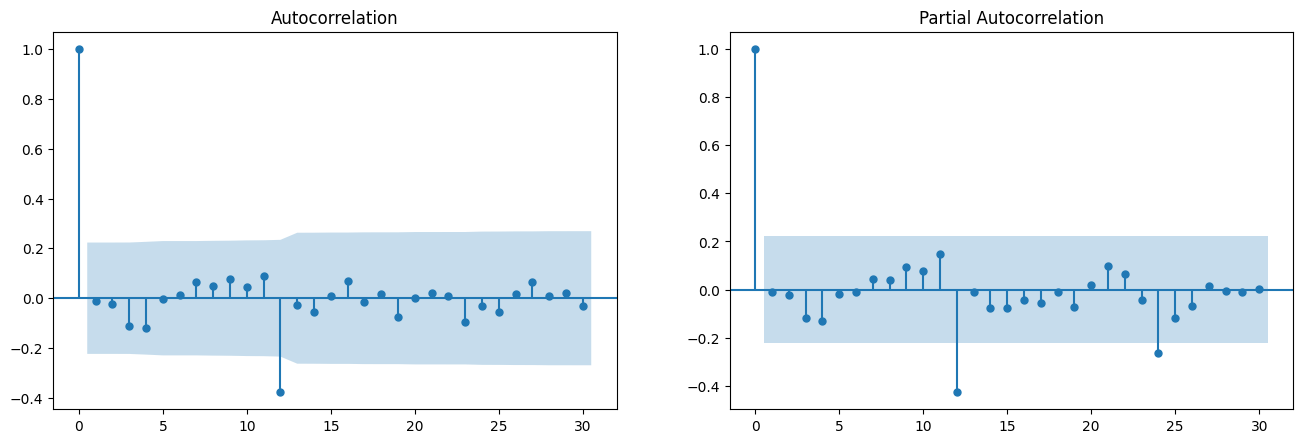

In [18]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=100)
plot_acf(model_fit.resid, lags=30, ax=axes[0])
plot_pacf(model_fit.resid, lags=30, ax=axes[1])
plt.show()

In [31]:
# Forecast
n_periods = 12
# log_fc, log_confint = model.predict(n_periods=n_periods, return_conf_int=True)
final_fc, final_conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

In [32]:
fc = np.power(final_fc, 4)
conf_int = np.power(final_conf_int, 4)

In [33]:
fc

array([248.39608946, 374.72178511, 429.98853788, 715.27515814,
       901.53289715, 955.9292398 , 730.92378765, 706.48647722,
       375.3872053 , 359.93896398, 306.37706048, 291.61959458])

In [34]:
conf_int

array([[ 173.16638746,  345.82477546],
       [ 263.95859449,  517.15298982],
       [ 283.1945313 ,  627.58122174],
       [ 480.91740235, 1026.36111533],
       [ 595.1793866 , 1313.23717333],
       [ 616.4059878 , 1419.49002719],
       [ 440.53984717, 1145.58550225],
       [ 410.94890994, 1138.44923614],
       [ 190.19966715,  671.08503625],
       [ 174.6750225 ,  663.84332038],
       [ 138.74925119,  593.3138132 ],
       [ 126.08735179,  583.04224703]])

In [35]:
index_of_fc = np.arange(len(com_sales['root_four_sales']), len(com_sales['root_four_sales'])+n_periods)

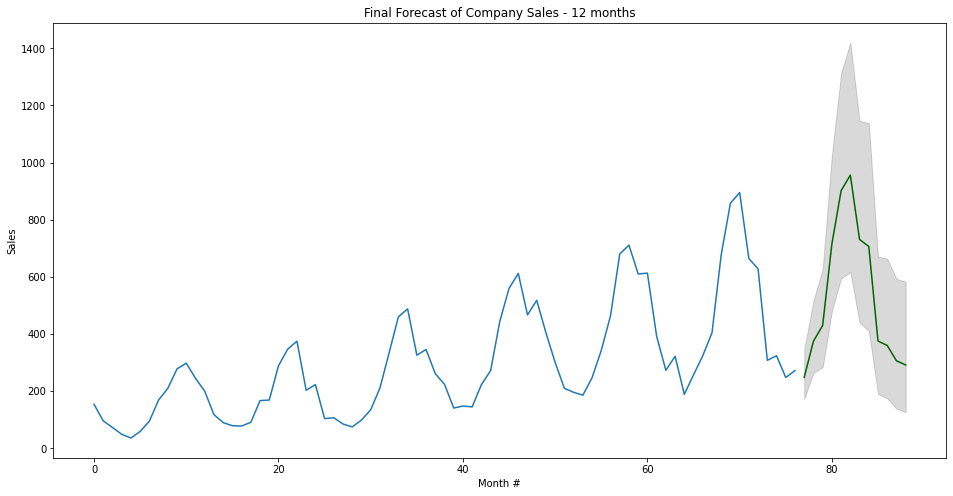

In [36]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(conf_int[:, 0], index=index_of_fc)
upper_series = pd.Series(conf_int[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(16,8))
plt.plot(com_sales['Sales'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title('Final Forecast of Company Sales - 12 months')
plt.xlabel('Month #')
plt.ylabel('Sales')
plt.show()